# Visualize GO analysis

In [1]:
import numpy as np
import pandas as pd

In [2]:
def get_top_HPA(fn, label):
    df = pd.read_csv(fn, sep='\t')
    df = df[~(df["source"].isin(["TF", "GO:CC"]))].sort_values('p_value').head(10)
    df['Log10'] = -np.log10(df['p_value'])
    df['Tissue'] = label
    return df


def get_top_enrichment(fn, label):
    df = pd.read_csv(fn, sep='\t')
    df = df[(df["source"].isin(["KEGG", "GO:BP"]))].sort_values('p_value').head(10)
    df['Log10'] = -np.log10(df['p_value'])
    df['Tissue'] = label
    return df

In [3]:
config = {
    'Caudate': '../../_m/caudate_functional_enrichment.txt',
    'DLPFC': '../../_m/dlpfc_functional_enrichment.txt',
    'Hippocampus': '../../_m/hippocampus_functional_enrichment.txt',
}

df1 = pd.DataFrame(); df2 = pd.DataFrame()
for tissue in ['Caudate', 'DLPFC', 'Hippocampus']:
    df1 = pd.concat([df1, get_top_HPA(config[tissue], tissue)], axis=0)
    df2 = pd.concat([df2, get_top_enrichment(config[tissue], tissue)], axis=0)

## Plot 

In [4]:
%load_ext rpy2.ipython

In [5]:
%%R
library(ggplot2)
library(tidyverse)

save_plot <- function(p, fn, w, h){
    for(ext in c('.svg', '.png', '.pdf')){
        ggsave(file=paste0(fn,ext), plot=p, width=w, height=h)
    }
}

plot_GO <- function(df){
    cbPalette <- ggpubr::get_palette(palette = "jco", 3)
    gg1 = df %>%
        ggplot(aes(x=Log10, y=term_name, color=Tissue)) + 
        geom_point(shape=18, alpha=0.8, size=4) + labs(y='', x='-Log10 (p adjust)') + 
        theme_bw() + 
        scale_colour_manual(name="Tissue", values=cbPalette, 
                            labels=c("Caudate", "DLPFC", "Hippocampus")) +
        geom_vline(xintercept = -log10(0.05), linetype = "dotted") +
        theme(axis.text=element_text(size=14),
              axis.title=element_text(size=18, face='bold'),
              strip.text=element_text(size=18, face='bold'))
    return(gg1)
}

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



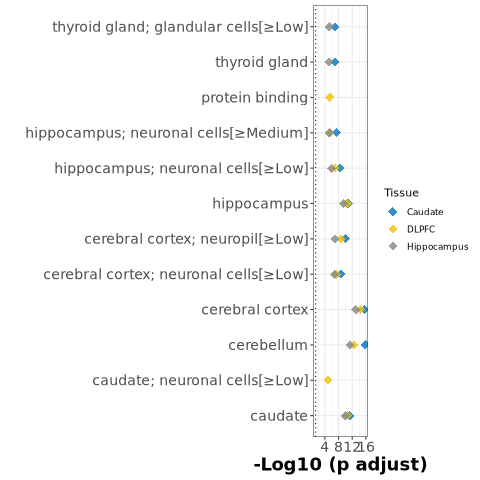

In [6]:
%%R -i df1
gg1 = plot_GO(df1)
print(gg1)
save_plot(gg1, "HPA_top10_stacked", 8, 6)

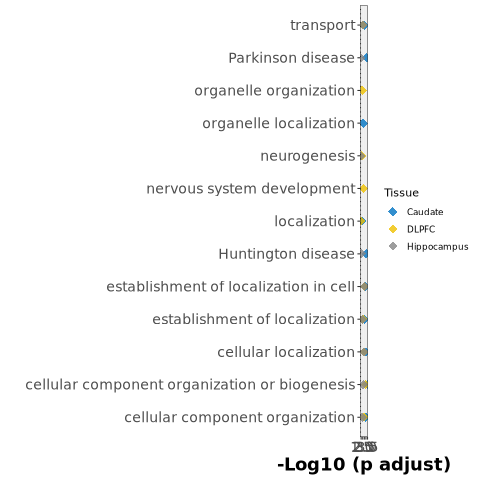

In [7]:
%%R -i df2
gg2 = plot_GO(df2)
print(gg2)
save_plot(gg2, "KEGG_BP_top10_stacked", 9, 6)